In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [37]:
IMAGE_SIZE = [224, 224]


In [22]:
import os

input_folder = r"C:\Users\user\Downloads\Google-Image-Scraper-master\photos" #Enter Input Folder

def scandirs(path):
    for root, dirs, files in os.walk(path):
        for currentFile in files:
            print( "processing file: " + currentFile)
            exts = ('.gif', '.webp')
            if currentFile.lower().endswith(exts):
                os.remove(os.path.join(root, currentFile))
scandirs(input_folder)

processing file: angrycat0.jpeg
processing file: angrycat1.jpeg
processing file: angrycat100.jpeg
processing file: angrycat102.jpeg
processing file: angrycat103.jpeg
processing file: angrycat104.jpeg
processing file: angrycat106.jpeg
processing file: angrycat108.jpeg
processing file: angrycat109.jpeg
processing file: angrycat11.jpeg
processing file: angrycat112.jpeg
processing file: angrycat114.jpeg
processing file: angrycat115.jpeg
processing file: angrycat116.jpeg
processing file: angrycat117.jpeg
processing file: angrycat118.jpeg
processing file: angrycat121.jpeg
processing file: angrycat122.jpeg
processing file: angrycat123.png
processing file: angrycat124.jpeg
processing file: angrycat125.jpeg
processing file: angrycat127.jpeg
processing file: angrycat128.png
processing file: angrycat129.jpeg
processing file: angrycat13.jpeg
processing file: angrycat134.jpeg
processing file: angrycat135.jpeg
processing file: angrycat136.jpeg
processing file: angrycat138.jpeg
processing file: angry

In [25]:
import splitfolders

input_folder = r"C:\Users\user\Downloads\Google-Image-Scraper-master\photos" #Enter Input Folder
output = r"C:\Users\user\Downloads\Google-Image-Scraper-master\output" #Enter Output Folder

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.8,0.2))

Copying files: 1989 files [00:02, 707.39 files/s]


In [13]:
train_path=r"C:\Users\user\Downloads\Google-Image-Scraper-master\output\train"
test_path=r"C:\Users\user\Downloads\Google-Image-Scraper-master\output\test"
val_path=r"C:\Users\user\Downloads\Google-Image-Scraper-master\output\val"

In [26]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img
        print(image_path)


        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat0.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat100.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat102.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat103.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat104.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat11.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat112.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat116.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat117.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat118.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat272.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat275.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat278.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat28.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat281.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat284.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat285.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat286.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat288.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat289.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat65.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat66.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat69.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat7.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat72.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat73.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat74.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat78.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat80.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat81.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/angry cat/angrycat86.png
C

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat240.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat241.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat243.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat244.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat246.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat247.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat25.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat250.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat252.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat259.jpeg
C:\Users\user\Downloads\Google-Image-Scra

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat423.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat424.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat427.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat428.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat429.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat43.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat432.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat438.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat444.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/annoyed cat/annoyedcat449.jpeg
C:\Users\user\Downloads\Google-Image-Scrap

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat20.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat201.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat202.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat203.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat206.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat209.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat21.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat212.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat215.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat216.jpeg
C:\Users\user\Downloads\Google-Image-Scraper

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat377.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat378.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat38.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat381.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat382.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat386.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat388.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat389.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat39.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/excited cat/excitedcat390.jpeg
C:\Users\user\Downloads\Google-Image-Scrape

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat163.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat164.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat166.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat176.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat177.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat178.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat179.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat18.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat182.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat187.jpeg
C:\Users\user\Downloa

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat341.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat343.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat347.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat351.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat360.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat362.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat367.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat37.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat371.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/friendly cat/friendlycat374.jpeg
C:\Users\user\Downloa

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat107.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat11.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat111.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat120.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat121.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat123.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat125.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat131.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat133.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat134.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happyc

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat343.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat344.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat346.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat348.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat351.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat353.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat358.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat362.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat363.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happycat367.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/happy cat/happy

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat122.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat125.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat126.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat128.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat13.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat130.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat131.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat132.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat136.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat138.jpeg
C:\Users\user\Downloads\Google-Image-Scra

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat319.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat320.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat321.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat322.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat323.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat326.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat327.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat331.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat332.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat333.jpeg
C:\Users\user\Downloads\Google-Image-Scr

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat52.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat56.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat59.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat6.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat62.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat63.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat7.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat72.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat74.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/relaxed cat/relaxedcat75.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\out

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat314.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat315.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat318.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat320.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat321.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat322.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat325.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat33.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat330.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat335.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\tra

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat91.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat97.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/scared cat/scaredcat98.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat1.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat100.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat101.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat107.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat108.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat110.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat112.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat29.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat290.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat291.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat293.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat295.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat296.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat297.png
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat3.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat301.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat303.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train

C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat51.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat53.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat55.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat56.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat58.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat59.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat6.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat62.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat66.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy cat/sleepycat67.jpeg
C:\Users\user\Downloads\Google-Image-Scraper-master\output\train/sleepy

In [27]:
train_x=np.array(x_train)
val_x=np.array(x_val)

In [28]:
train_x=train_x/255.0
val_x=val_x/255.0

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1589 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [32]:
train_y=training_set.classes
val_y=val_set.classes

In [33]:
training_set.class_indices


{'angry cat': 0,
 'annoyed cat': 1,
 'excited cat': 2,
 'friendly cat': 3,
 'happy cat': 4,
 'relaxed cat': 5,
 'scared cat': 6,
 'sleepy cat': 7}

In [35]:
train_y.shape,val_y.shape


((1589,), (400,))

In [38]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 13s 0us/step


In [39]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [41]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(8, activation='softmax')(x)

In [42]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [45]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
50/50 [==============================] - 280s 6s/step - loss: 2.4199 - accuracy: 0.2637 - val_loss: 1.8448 - val_accuracy: 0.3600
Epoch 2/10
50/50 [==============================] - 273s 5s/step - loss: 1.0991 - accuracy: 0.6281 - val_loss: 1.6932 - val_accuracy: 0.4275
Epoch 3/10
50/50 [==============================] - 256s 5s/step - loss: 0.6170 - accuracy: 0.8276 - val_loss: 1.9593 - val_accuracy: 0.3900
Epoch 4/10
50/50 [==============================] - 255s 5s/step - loss: 0.4187 - accuracy: 0.9081 - val_loss: 1.7801 - val_accuracy: 0.4225
Epoch 5/10
50/50 [==============================] - 255s 5s/step - loss: 0.2972 - accuracy: 0.9478 - val_loss: 1.8391 - val_accuracy: 0.4350
Epoch 6/10
50/50 [==============================] - 256s 5s/step - loss: 0.2695 - accuracy: 0.9471 - val_loss: 1.9111 - val_accuracy: 0.4150
Epoch 7/10
50/50 [==============================] - 255s 5s/step - loss: 0.2124 - accuracy: 0.9666 - val_loss: 2.0459 - val_accuracy: 0.4125
Epoch 7: earl

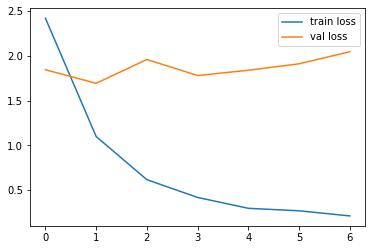

In [46]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

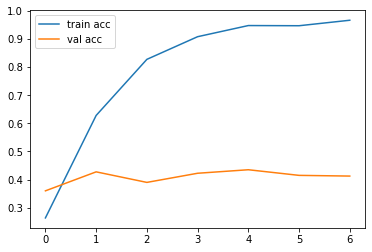

In [47]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [48]:
model.save("vgg-iot.h5")
